In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
from tabulate import tabulate

In [14]:
#funciones
def fnModa(x):
    return x.mode()[0]

def fnCV(x):
    return x.std()/x.mean()

def fnGaussiana(x_int,X):
    # estimacion de los parametros
    mu = X.mean()
    s1 = X.std()
    # obterner la gaussiana
    A = 1/(math.sqrt(2*math.pi)*s1)
    B = -0.5*((x_int-mu)/s1)**2
    # fg = A*math.exp(B) # vectorial
    fg = [A*math.exp(B[i]) for i in range(0,x_int.shape[0])]
    return fg

def fnExponencial(x_int,X):
    # estimacion de parametros
    lamda = 1/X.mean()
    # obtener la exponencial de 1P
    fe = [lamda*math.exp(-lamda*x_int[i]) for i in range(0,x_int.shape[0])]
    return fe

def fnGumbel(x_int,X):
    # estimacion de los parametros
    mu = X.mode().max()
    beta = 0.78*X.std()
    # obtener la fn gumbel
    z = [(x_int[i]-mu)/beta for i in range(0,x_int.shape[0])] # vector
    fgum = [(1/beta)*math.exp(-(z[i]+math.exp(-z[i]))) for i in range(0,x_int.shape[0])]
    return fgum

def fnRayleigh(x_int, X):
    sig = X.std()
    A = x_int/ (sig**2)
    B = (-x_int**2)/(2*sig**2)
    fr = A * np.exp(B)

    return fr


In [15]:
#leer datos
dataMat = pd.read_csv("student-mat.csv",delimiter=';')
dataPor = pd.read_csv("student-por.csv",delimiter=';')
#seleccionar variables
dfMat = dataMat.loc[:,['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']]
colnames = dfMat.columns.values
#dfMat = dataMat.loc[:,['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']]

In [16]:
#resumen estadistico
dfMatRes = dfMat.agg(["mean",fnModa,"median","var","std",fnCV,"kurt","skew"])

# Renombrar las filas
dfMatRes = dfMatRes.rename(index={"mean": "Media",
                                  "fnModa": "Moda",
                                  "median": "Mediana",
                                  "var": "Varianza",
                                  "std": "Desviación estándar",
                                  "fnCV": "Covarianza",
                                  "kurt": "Curtosis",
                                  "skew": "Sesgo"})

dfMatRes

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Media,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
Moda,16.000000,4.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,1.000000,5.000000,0.000000,10.000000,9.000000,10.000000
Mediana,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
Varianza,1.628285,1.198445,1.184180,0.486513,0.704324,0.553017,0.803997,0.997725,1.239388,0.793420,1.658678,1.932944,64.049541,11.017053,14.148917,20.989616
Desviación estándar,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
Covarianza,0.076427,0.398177,0.431565,0.481668,0.412313,2.225319,0.227330,0.308725,0.358098,0.601441,0.562121,0.391147,1.401873,0.304266,0.351086,0.439881
Curtosis,-0.001222,-1.090014,-1.198539,2.344190,-0.014432,5.004727,1.139772,-0.301807,-0.770250,4.759492,-0.790845,-1.014078,21.719150,-0.693830,0.627706,0.403421
Sesgo,0.466270,-0.318381,-0.031672,1.607029,0.632142,2.387026,-0.951882,-0.163351,0.116502,2.190762,0.611960,-0.494604,3.671579,0.240613,-0.431645,-0.732672


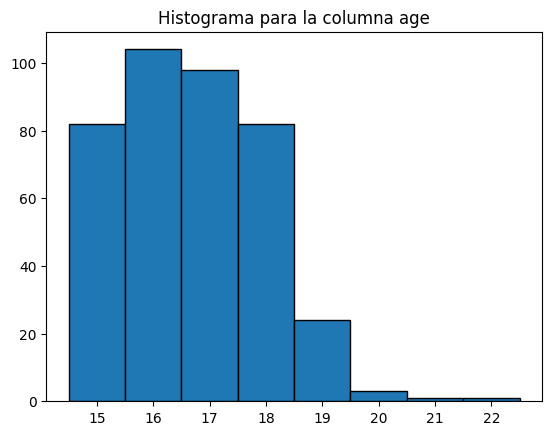

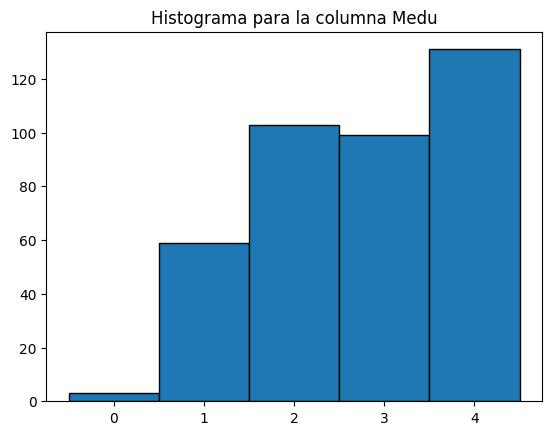

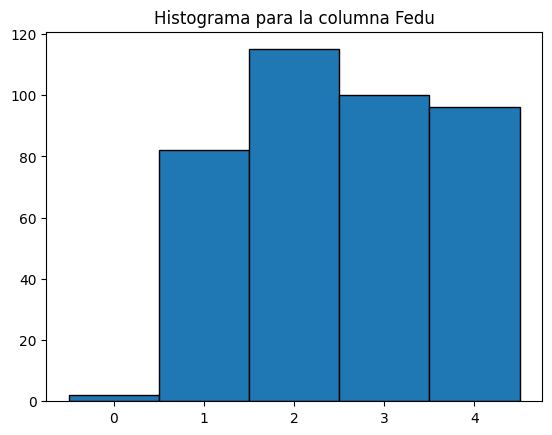

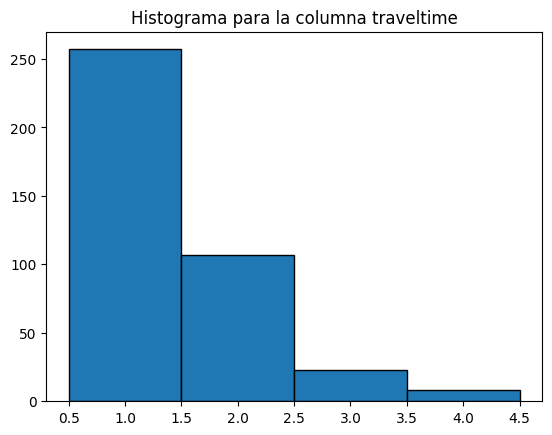

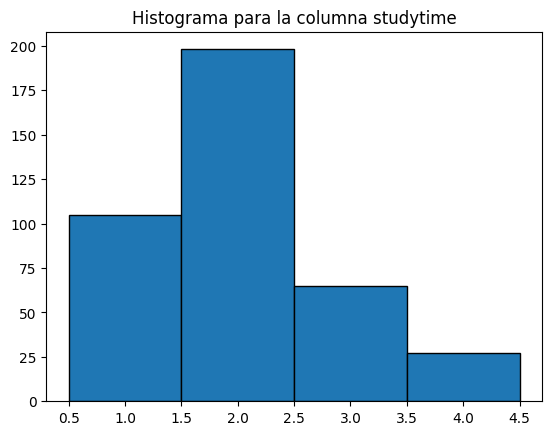

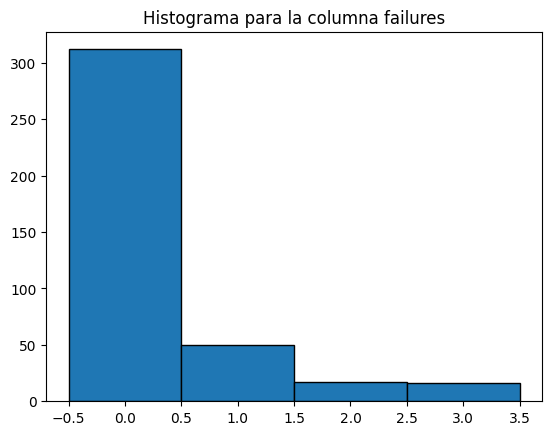

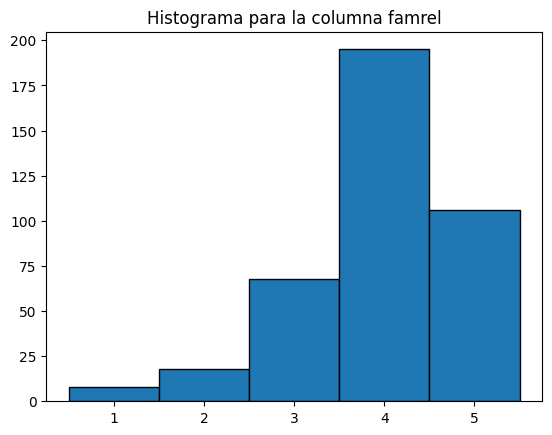

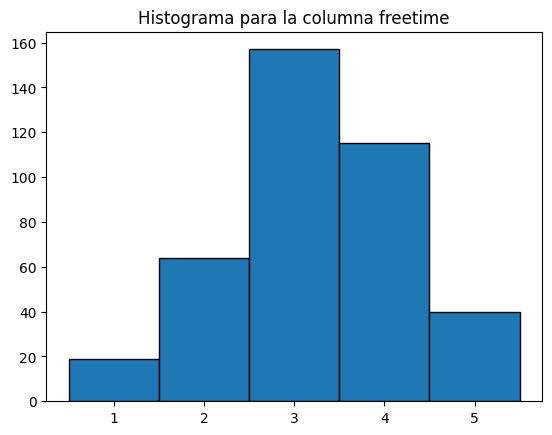

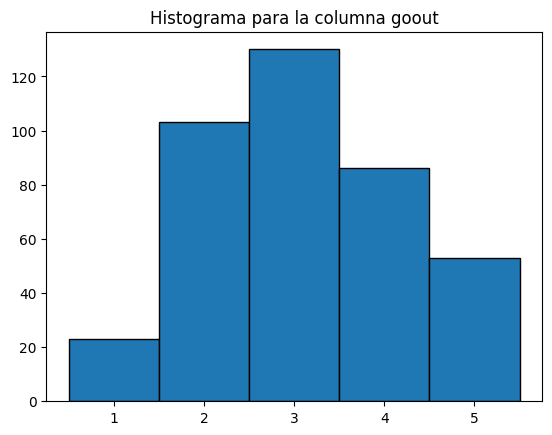

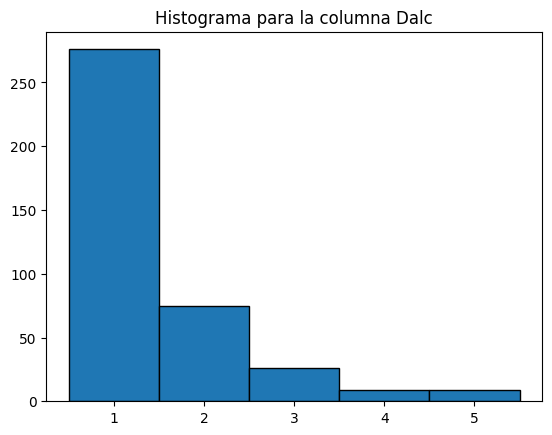

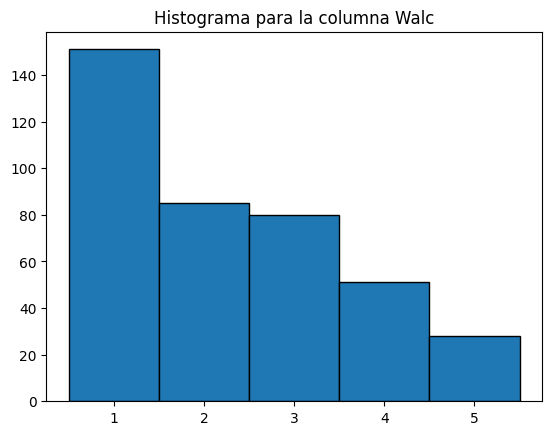

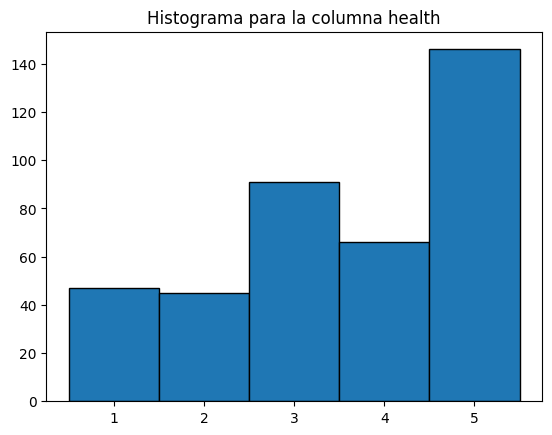

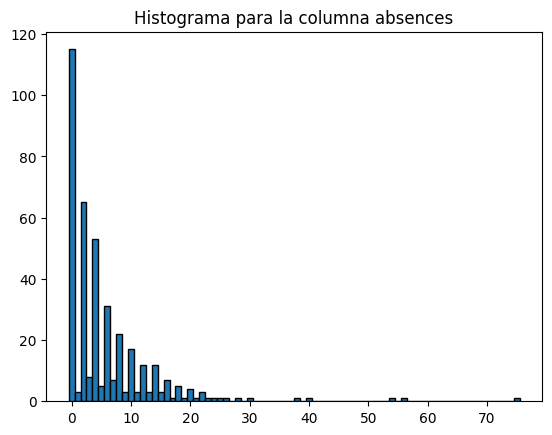

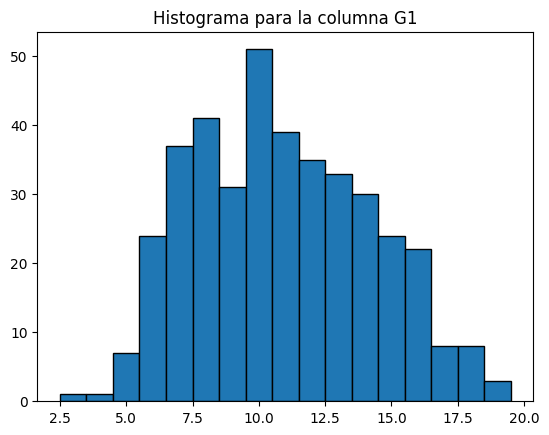

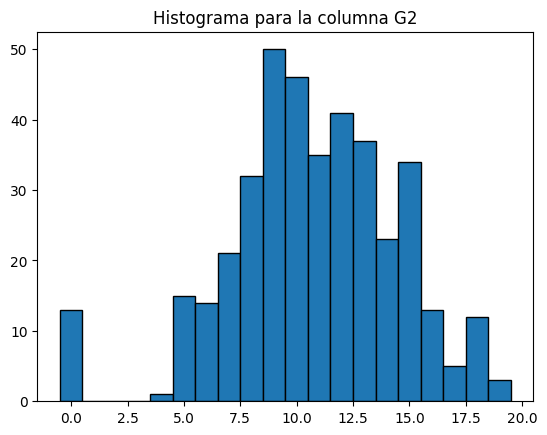

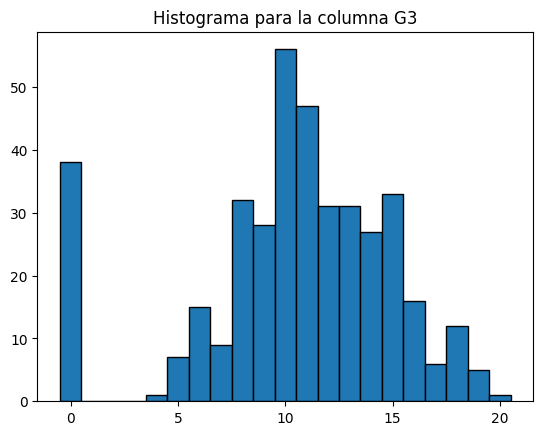

In [92]:
#Histogramas
for i in range (len(dfMat.columns)):
    fig, ax = plt.subplots()
    ax.hist(dfMat.iloc[:,i], bins=range(min(dfMat.iloc[:,i]), max(dfMat.iloc[:,i]) + 2), align='left', edgecolor="black")
    # Agregar titulo al grafico
    ax.set_title(f"Histograma para la columna {dfMat.columns[i]}")

<Axes: >

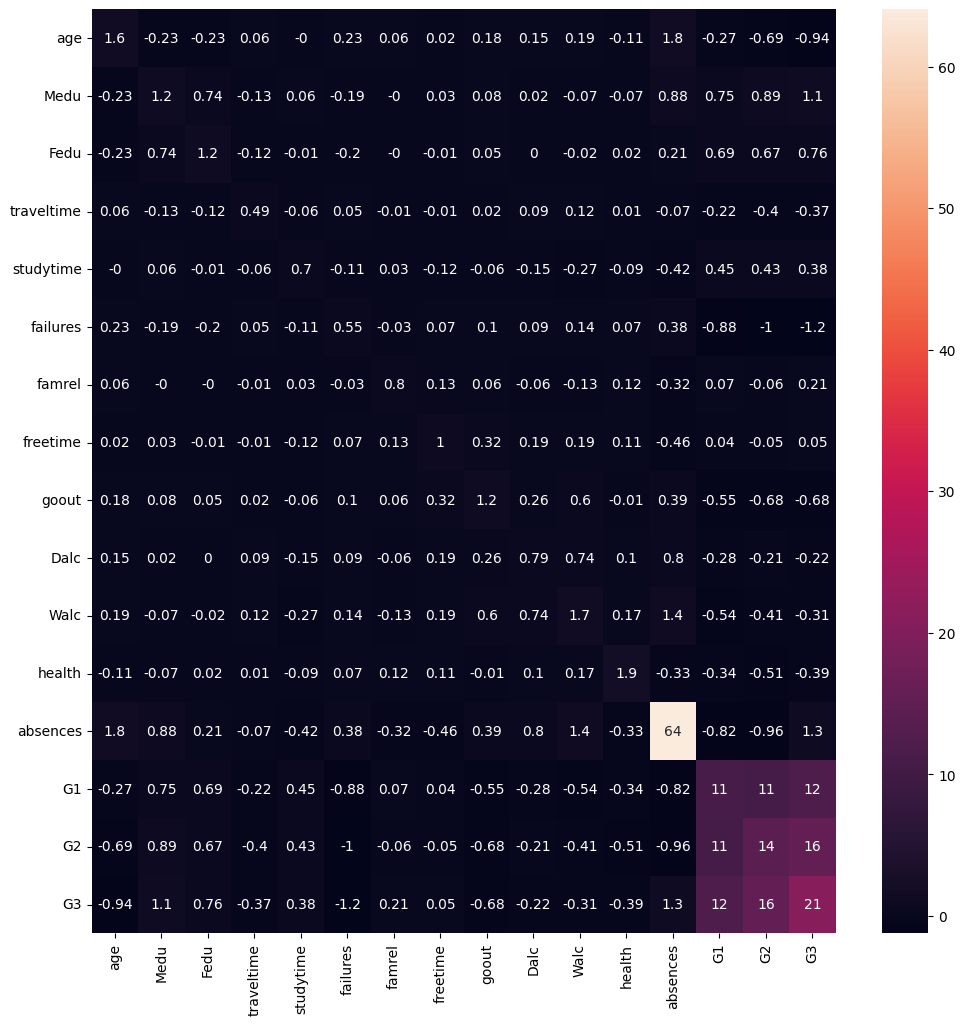

In [17]:
#Covarianza
mtxCov = dfMat.cov().round(2)
mtxCov


#Mostrar grafica covarianza
plt.figure(figsize=(12,12))
sns.heatmap(mtxCov,annot=True)

<Axes: >

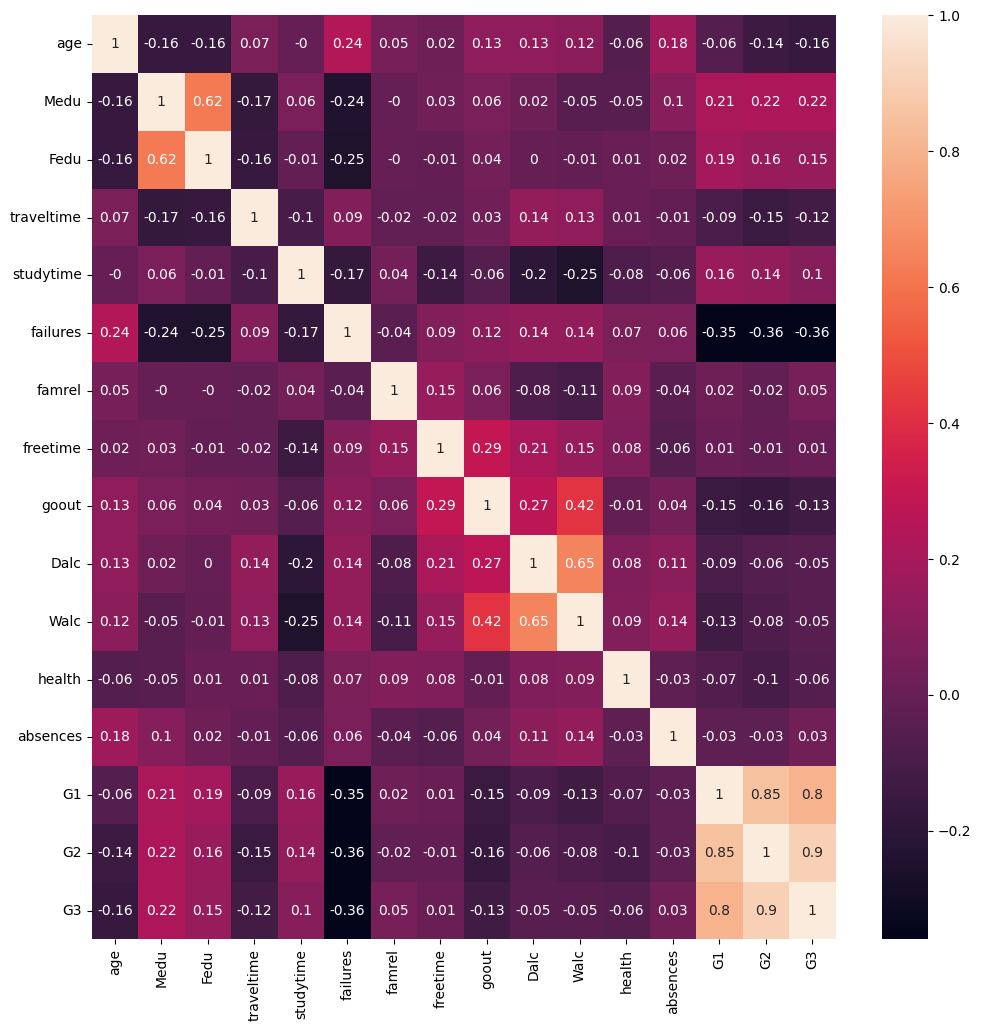

In [18]:
#Correlacion
mtxCorr = dfMat.corr().round(2)
#mtxCorr

#Mostrar grafica correlacion
plt.figure(figsize=(12,12))
sns.heatmap(mtxCorr,annot=True)

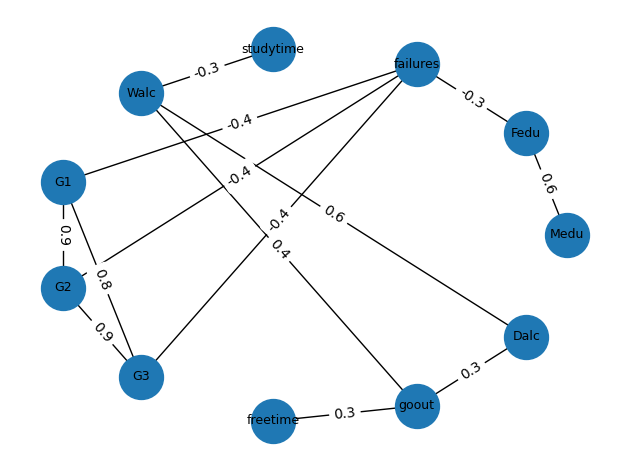

In [19]:
#grafo de correlacion
#Grafo con las dependencias más significativas
datos = dfMat.to_numpy()
mCorr = np.corrcoef(datos, rowvar=False).round(decimals=1)

dependencias = np.abs(mCorr) >= 0.3

grafo = nx.Graph()

for i in range(len(mCorr)):
    for j in range(len(mCorr)):
        if (i != j and dependencias[i, j]):
            grafo.add_edge(colnames[i], colnames[j], weight=mCorr[i,j])

pos = nx.circular_layout(grafo)

#Nodos
nx.draw_networkx_nodes(grafo, pos, node_size=1000)

#Edges
nx.draw_networkx_edges(grafo, pos, edgelist=grafo.edges)

#Node labels
nx.draw_networkx_labels(grafo, pos, font_size=9)

#Edge labels
edgeLabels = nx.get_edge_attributes(grafo,"weight")
nx.draw_networkx_edge_labels(grafo, pos, edgeLabels)


ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.show()

In [84]:
bins = range(min(X.iloc[:,5]), max(X.iloc[:,5])+2)
bins

range(0, 5)

16


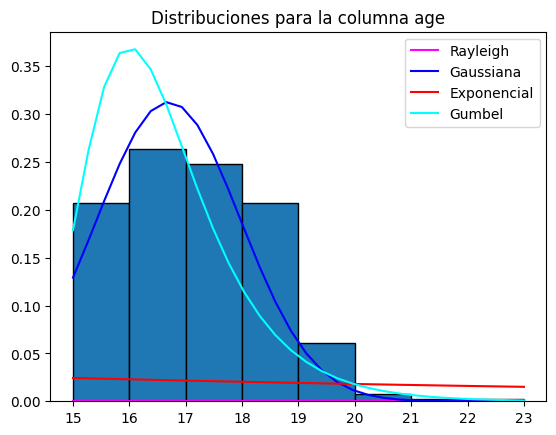

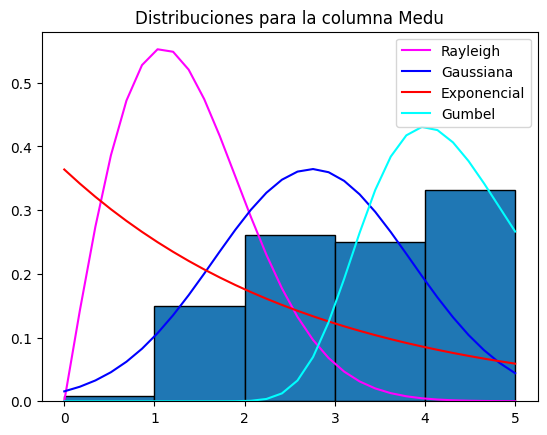

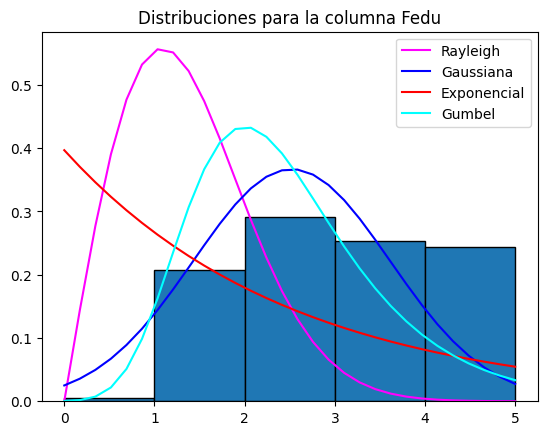

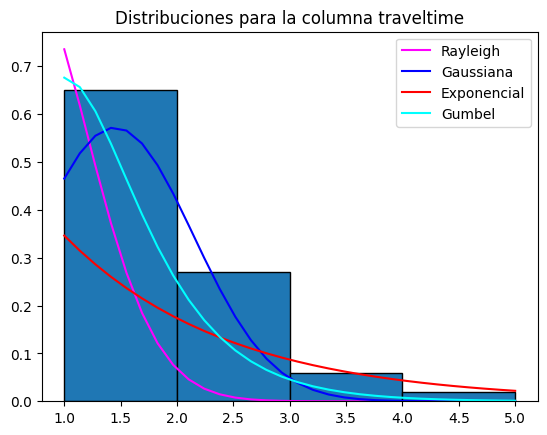

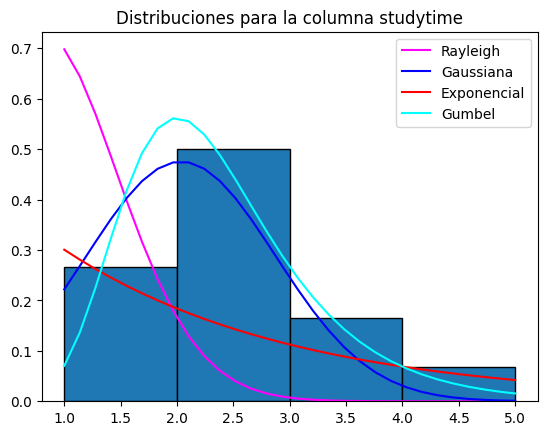

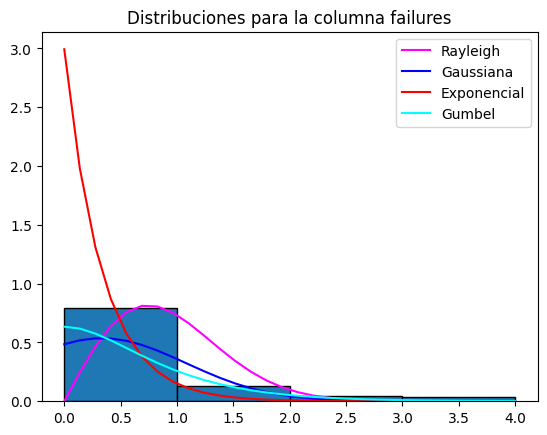

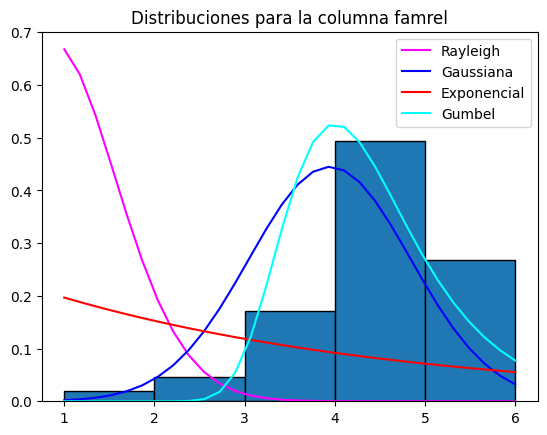

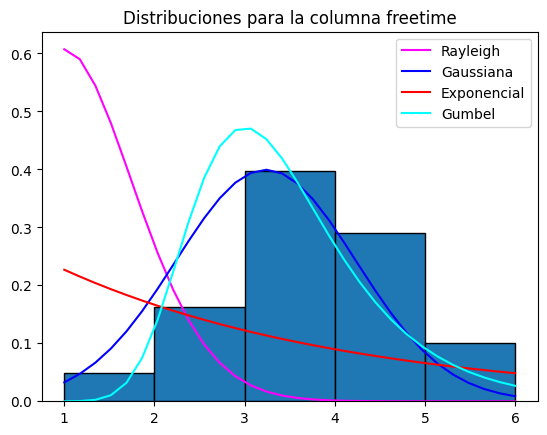

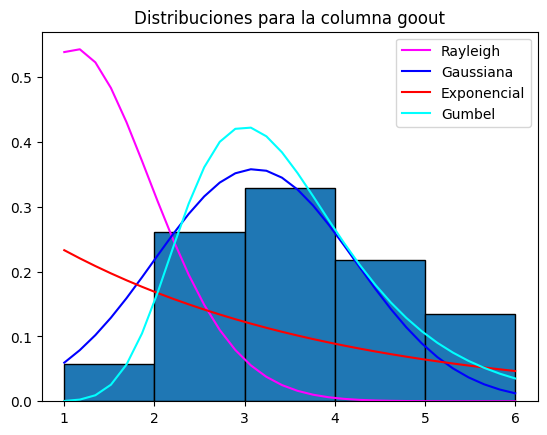

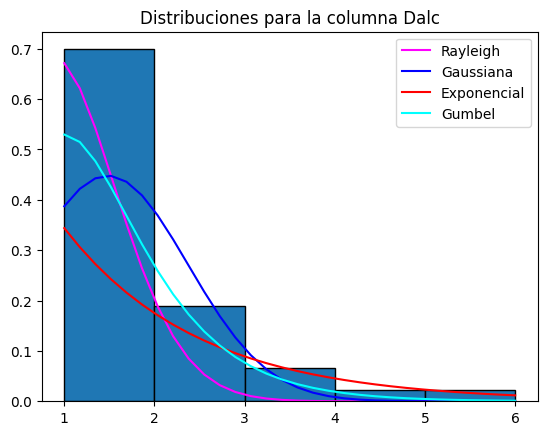

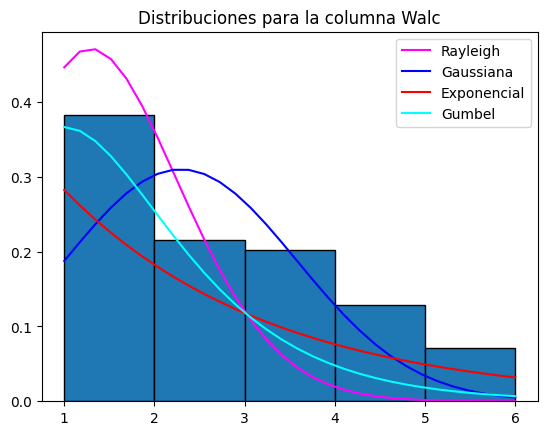

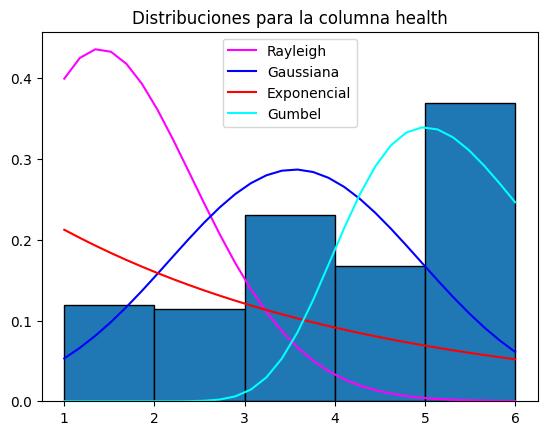

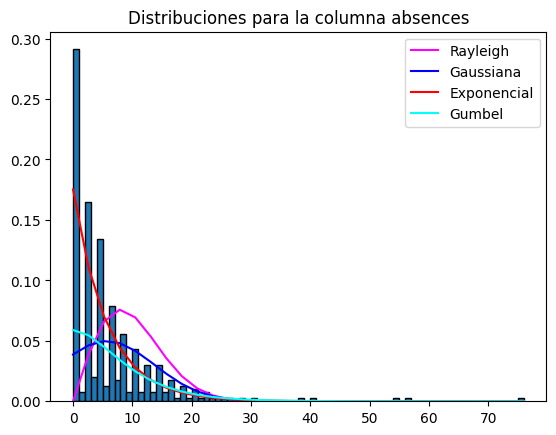

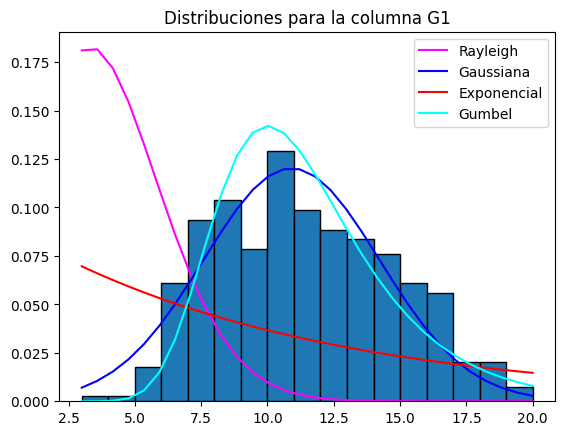

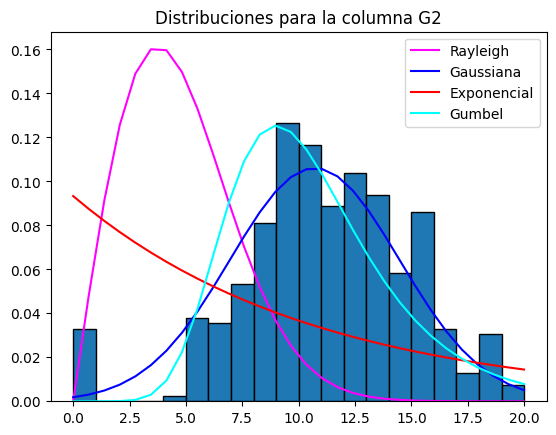

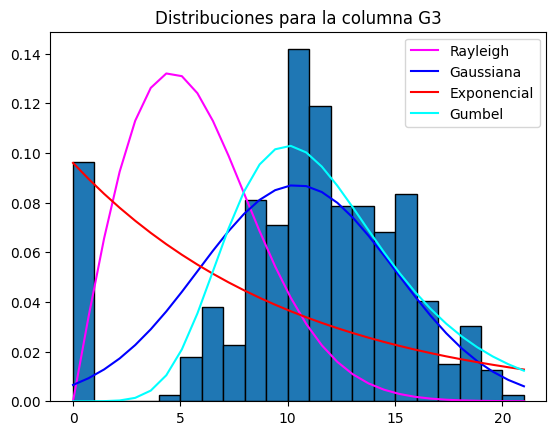

In [86]:
#distribucion de probabilidad 
df = dfMat
X = df.iloc[:,:] #Todas menos g1,g2,g3
print(len(X.columns))
#8 columnas, 4 distribuciones

for i in range(len(X.columns)):
    fig, ax = plt.subplots()
    # ax.hist(X.iloc[:,i],bins=40, density=True)
    
    bins = range(min(X.iloc[:,i]), max(X.iloc[:,i]) + 2)
    ax.hist(X.iloc[:,i], bins, density=True, edgecolor="black")

    # intervalo de los datos (rango)
    # nsize= max(X.iloc[:,i]) - min(X.iloc[:,i]) + 1
    nsize= 30
    x_int = np.linspace(min(X.iloc[:,i]), max(X.iloc[:,i]) + 1,nsize)

    # distribucion Rayleigh 
    fr = fnRayleigh(x_int,X.iloc[:,i])
    ax.plot(x_int,fr, color="magenta", label="Rayleigh")

    # distribucion normal (doña Gaussiana)
    fg = fnGaussiana(x_int,X.iloc[:,i])
    ax.plot(x_int,fg, color="blue", label="Gaussiana")

    # distribucion exponencial 1P
    fe = fnExponencial(x_int,X.iloc[:,i])
    ax.plot(x_int,fe,color='red', label="Exponencial")

    # distribucion gumbel
    fgumbel = fnGumbel(x_int,X.iloc[:,i])
    ax.plot(x_int,fgumbel,color="cyan", label="Gumbel")

    # Agregar titulo al grafico
    ax.set_title(f"Distribuciones para la columna {X.columns[i]}")

    # Mostrar el grafico
    plt.legend()
    plt.show()